**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [27]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
from scipy.optimize import minimize

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import our class
from exam import ExamClass

# We now define our model 
model = ExamClass()

par = model.par

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [28]:
# we define p1 and p2 using linspace
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)
        
# make a empty list
results = []

# Iterate over p1 and p2
for p1 in p1_values:
    for p2 in p2_values:
        labor_error, goods1_error, goods2_error = model.compute_market_errors(p1, p2)
        results.append([p1, p2, labor_error, goods1_error, goods2_error])
        
# create a dataframe using the empty list
df_results = pd.DataFrame(results, columns=['p1', 'p2', 'Labor Error', 'Goods 1 Error', 'Goods 2 Error'])
        
# Display the DataFrame
print("Market Clearing Errors:")
print(df_results.to_string(index=False))


Market Clearing Errors:
      p1       p2  Labor Error  Goods 1 Error  Goods 2 Error
0.100000 0.100000    -5.158978       0.027500      -0.002500
0.100000 0.311111    -3.725680      -0.037593       0.089861
0.100000 0.522222    -2.845267      -0.169537       0.163020
0.100000 0.733333    -2.307661      -0.368333       0.233561
0.100000 0.944444    -1.914838      -0.633981       0.303239
0.100000 1.155556    -1.588665      -0.966481       0.372527
0.100000 1.366667    -1.293425      -1.365833       0.441606
0.100000 1.577778    -1.010516      -1.832037       0.510559
0.100000 1.788889    -0.729251      -2.365093       0.579432
0.100000 2.000000    -0.443028      -2.965000       0.648250
0.311111 0.100000    -2.815418       0.106478      -0.306265
0.311111 0.311111    -2.879305       0.085556      -0.007778
0.311111 0.522222    -2.581297       0.043145       0.104852
0.311111 0.733333    -2.231412      -0.020754       0.192138
0.311111 0.944444    -1.903717      -0.106141       0.271075


**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [29]:
# we define the market clearing conditions and clear for two markets (Walras' law)
def market_clearing_conditions(prices):
    p1, p2 = prices
    goods2_error, goods1_error, _= model.compute_market_errors(p1, p2)
    return [goods2_error, goods1_error]

# set an initial guess for p1 and p2
initial_guess = [1.0, 2.0] 

# we use fsolve to minimize the errors
equilibrium_prices = fsolve(market_clearing_conditions, initial_guess)

# we find the errors at the given prices for p1 and p2
labor_error, goods1_error, goods2_error = model.compute_market_errors(equilibrium_prices[0], equilibrium_prices[1])

# we print the equilibrium prices and the errors
print("Equilibrium prices: p1 =", equilibrium_prices[0])
print ("Equilibrium prices: p2 =", equilibrium_prices[1])
print("Labor market error:", labor_error)
print("Goods market 1 error:", goods1_error)
print("Goods market 2 error:", goods2_error)

Equilibrium prices: p1 = 0.9887064849802765
Equilibrium prices: p2 = 2.1358501186638312
Labor market error: 2.6645352591003757e-15
Goods market 1 error: -3.885780586188048e-15
Goods market 2 error: 0.5339625296659597


We find that when prices is: (p1, p2, w) (0.98870, 2.13585, 1) the market clears. This is because Walras law says that the overall demand for all markets is always 0. Therefore when we clear two markets (out of three) the third market also clears, since total demand has to be 0. Notice the errors are not quiet 0, but very close to, which is because of the way Python works.

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

# MANGLER!!

In [30]:
# Write your answer here 

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [31]:
# set seed
np.random.seed(0) 

# we start out by defining epsilon given K and J
epsilon = np.random.normal(loc=0, scale=par.sigma, size=(par.K, par.J))

# expected utility is given as v plus the mean of epsilon
expected_utility = par.v + np.mean(epsilon, axis=0)

# print the expected utilities
print("Expected utility for each career track:", expected_utility)

Expected utility for each career track: [0.98506824 1.99928957 2.98942508]


We can see that the third career track yields the highest expected utility, and the first career track yields the lowest expected utility.

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

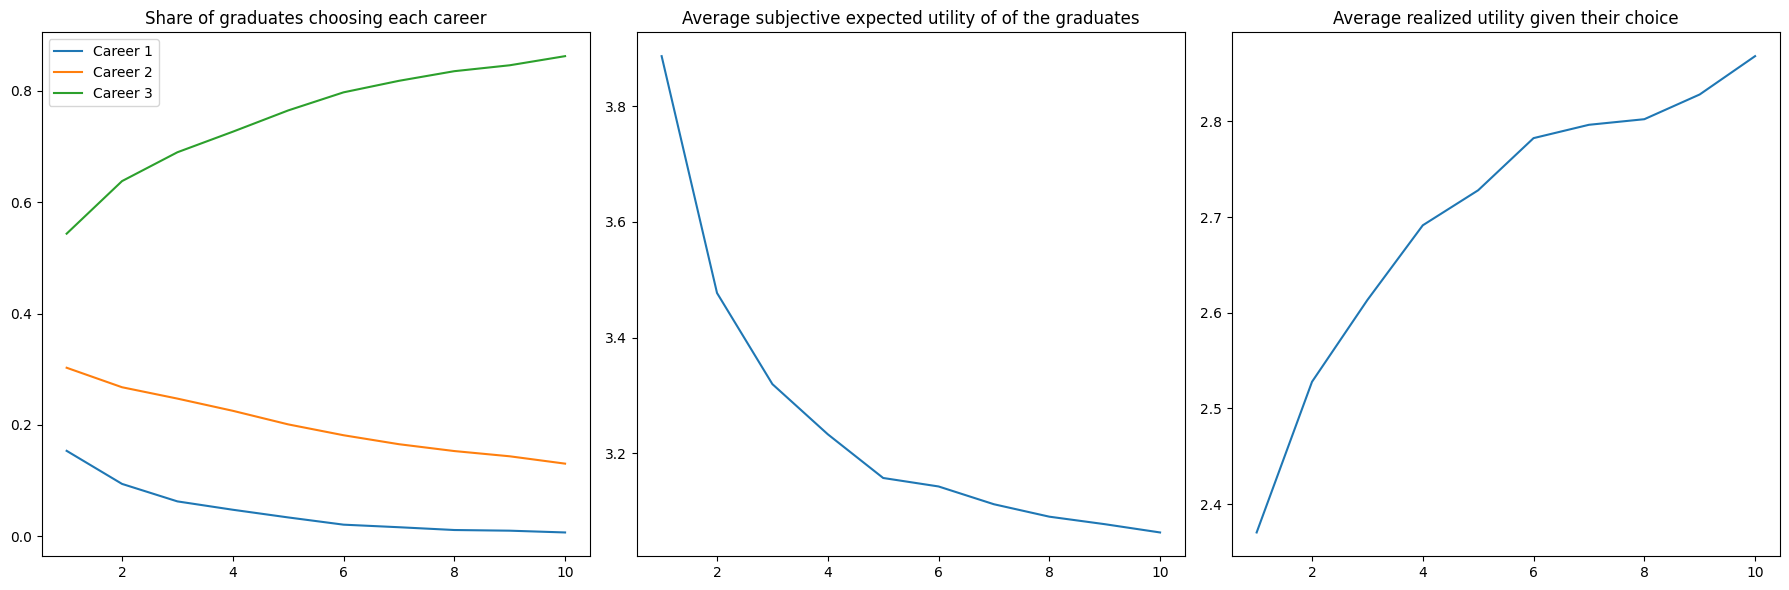

In [32]:
# run the simulations
model.simulate_career_choices()

# we find amount of individuals choosing each career, we loop over N individuals and J careers
career_shares = np.zeros((par.N, par.J))
for i in range(par.N):
    for j in range(par.J):
        career_shares[i, j] = np.mean(model.chosen_career[:, i] == j)

# find the average subjective expected utility
average_expected_utility = np.mean(model.prior_expectation, axis=0)

# find the average realized utility
average_realized_utility = np.mean(model.realized_value, axis=0)

# plot the results
plt.figure(figsize=(18, 6))

# share of graduates choosing each career
plt.subplot(1, 3, 1)
for j in range(par.J):
    plt.plot(par.F, career_shares[:, j], label=f'Career {j+1}')
plt.title('Share of graduates choosing each career')
plt.legend()

# average subjective expected utility
plt.subplot(1, 3, 2)
plt.plot(par.F, average_expected_utility)
plt.title('Average subjective expected utility of of the graduates')

# average realized utility
plt.subplot(1, 3, 3)
plt.plot(par.F , average_realized_utility)
plt.title('Average realized utility given their choice')
plt.tight_layout()
plt.show()

The first graph illustrates the percentage of individuals choosing each career track based on the number of friends they have. We can see that a higher number of friends yields a higher share who chooses career three.

The second graph displays the average utility of individuals' friends. The higher amount of friends, the lower the expected utility is.

In the third graph we can see the average realized utility, which is higher for individuls with more friends, indicatin that individuals with more friends tend to experience higher realized utility.

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

# MANGLER!!

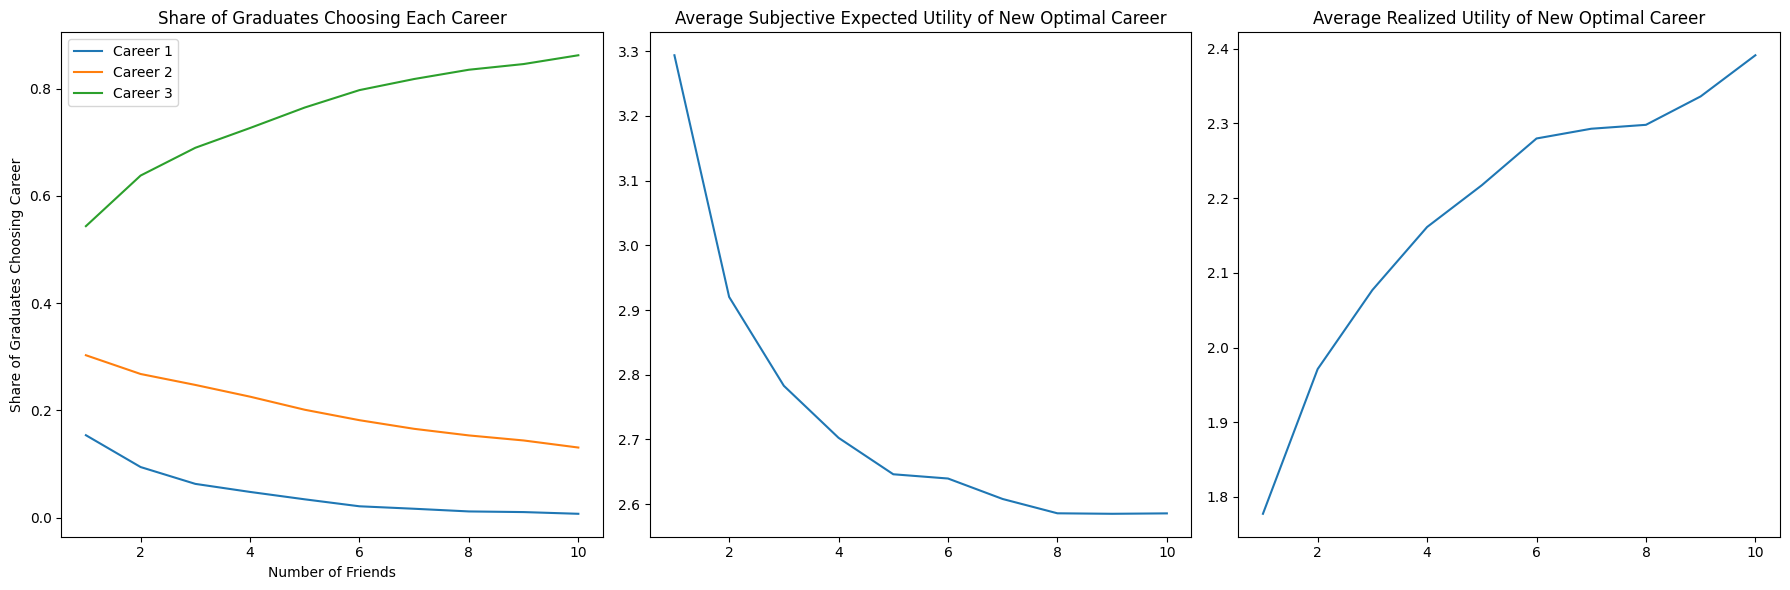

In [33]:
par.question_2 = True

model.simulate_career_choices()

# we find amount of individuals choosing each career, we loop over N individuals and J careers
career_shares = np.zeros((par.N, par.J))
for i in range(par.N):
    for j in range(par.J):
        career_shares[i, j] = np.mean(model.chosen_career[:, i] == j)

# find the average subjective expected utility
average_expected_utility = np.mean(model.prior_expectation, axis=0)

# find the average realized utility
average_realized_utility = np.mean(model.realized_value, axis=0)

# plot the results
plt.figure(figsize=(18, 6))

# share of graduates choosing each career
plt.subplot(1, 3, 1)
for j in range(par.J):
    plt.plot(par.F, career_shares[:, j], label=f'Career {j+1}')
plt.xlabel('Number of Friends')
plt.ylabel('Share of Graduates Choosing Career')
plt.title('Share of Graduates Choosing Each Career')
plt.legend()

# average subjective expected utility
plt.subplot(1, 3, 2)
plt.plot(par.F, average_expected_utility)
plt.title('Average Subjective Expected Utility of New Optimal Career')

# average realized utility
plt.subplot(1, 3, 3)
plt.plot(par.F, average_realized_utility)
plt.title('Average Realized Utility of New Optimal Career')
plt.tight_layout()
plt.show()

# plot switch shares
#plt.figure(figsize=(12, 6))
#plt.plot(par.F, average_switch_shares )
#for j in range(par.J):
    #plt.plot(par.F, model.switch_shares[:, j], label=f'Initial Career {j+1}')
#plt.title('Share of Graduates Switching Careers Conditional on Initial Career Choice')
#plt.legend()
#plt.show()


## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [34]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

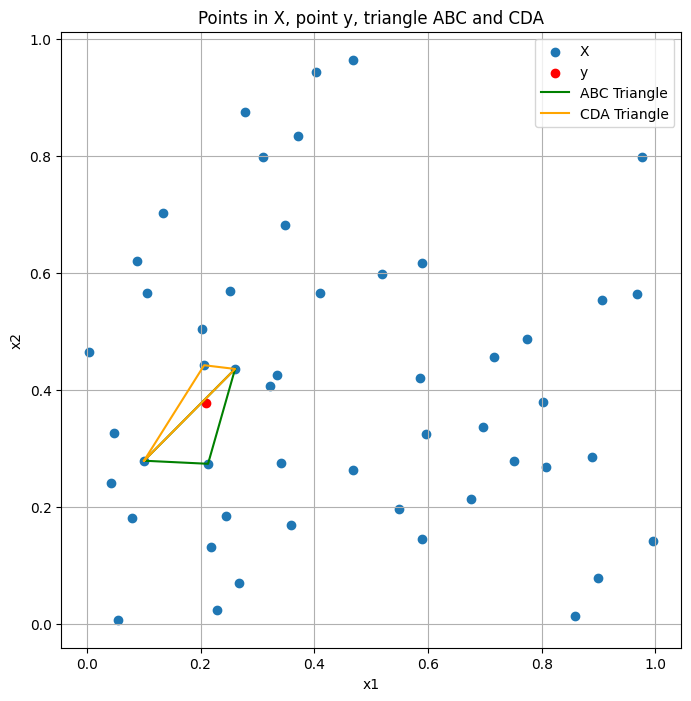

In [35]:
# we find the closests points A, B, C and D from the set of points in X
A, B, C, D = model.find_closest_points(X)

# we plot the triangles ABC and CDA, and all the set of points in X and y
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], label='X')
plt.scatter(y[0], y[1], color = "red", label='y')
plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], color = "green", label='ABC Triangle')
plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], color = "orange", label='CDA Triangle')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Points in X, point y, triangle ABC and CDA')
plt.legend()
plt.grid(True)
plt.show()

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [36]:
# we define the barycentric coordinates for triangle ABC using the coordinates found in the question above
denom_ABC = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
r1_ABC = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / denom_ABC
r2_ABC = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / denom_ABC
r3_ABC = 1 - r1_ABC - r2_ABC

# we define the barycentric coordinates for triangle CDA using the coordinates found in the question above
denom_CDA = (D[1] - A[1]) * (C[0] - A[0]) + (A[0] - D[0]) * (C[1] - A[1])
r1_CDA = ((D[1] - A[1]) * (y[0] - A[0]) + (A[0] - D[0]) * (y[1] - A[1])) / denom_CDA
r2_CDA = ((A[1] - C[1]) * (y[0] - A[0]) + (C[0] - A[0]) * (y[1] - A[1])) / denom_CDA
r3_CDA = 1 - r1_CDA - r2_CDA

# we find which triangle y is inside
if 0 <= r1_ABC <= 1 and 0 <= r2_ABC <= 1 and 0 <= r3_ABC <= 1: 
    print("Point y is inside triangle ABC")
elif 0 <= r1_CDA <= 1 and 0 <= r2_CDA <= 1 and 0 <= r3_CDA <= 1: 
    print("Point y is inside triangle CDA")

# we print y's coordinates
print("Coordinates of point y:", y)

# we print the barycentric coordinates for triangle ABC
print("Barycentric coordinates of y with respect to triangle ABC:", r1_ABC, r2_ABC, r3_ABC)

# we print the barycentric coordinates for triangle CDA
print("Barycentric coordinates of y with respect to triangle CDA:", r1_CDA, r2_CDA, r3_CDA)


Point y is inside triangle ABC
Coordinates of point y: [0.20901926 0.37774759]
Barycentric coordinates of y with respect to triangle ABC: 0.6286263152916166 0.06910145494351515 0.3022722297648682
Barycentric coordinates of y with respect to triangle CDA: 0.3682598757102867 -0.13392661883334067 0.765666743123054


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [37]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [38]:
# we know that y is inside triangle ABC, so we compute the approximation of f(y) as
f_y_approx = r1_ABC * f(A) + r2_ABC * f(B) + r3_ABC * f(C)

# we find the true value of f(y)
f_y_true = f(y)

# we print the two values
print("True value of f(y):", f_y_true)
print("Approximated value of f(y):", f_y_approx)

True value of f(y): 0.0789565216259594
Approximated value of f(y): 0.08405201731052576


We can see that the approximated value of f(y) is relatively close to the true value of f(y).

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [39]:
# we have changed the second (0.8,0.2) to (0.2,0.8), since we assume it is a mistake, and we change it to an array
Y = np.array([[0.2, 0.2], [0.8, 0.2], [0.8, 0.8], [0.2, 0.8], [0.5, 0.5]])

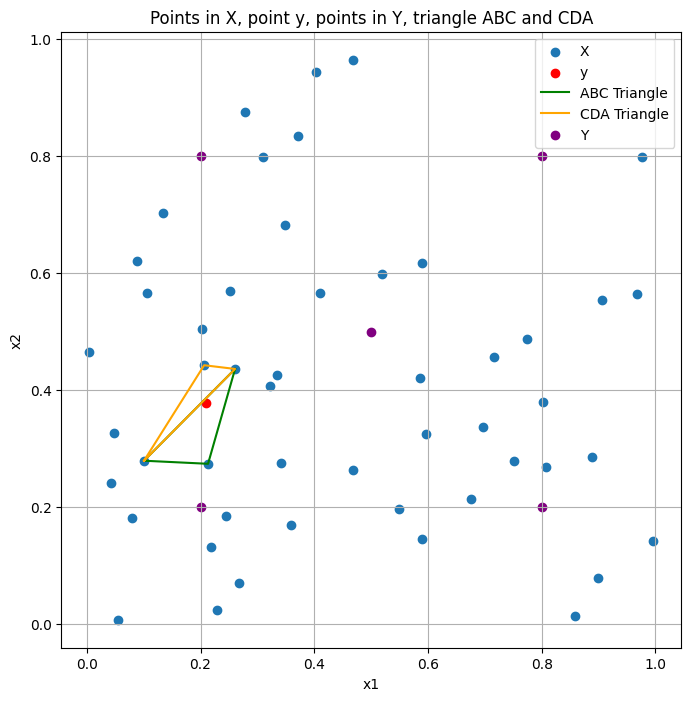

In [40]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], label='X')
plt.scatter(y[0], y[1], color='red', label='y')
plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], color='green', label='ABC Triangle')
plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], color='orange', label='CDA Triangle')
plt.scatter(Y[:, 0], Y[:, 1], color='purple', label='Y')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Points in X, point y, points in Y, triangle ABC and CDA')
plt.legend()
plt.grid(True)
plt.show()

We can see that non of the points in Y is inside either of the triangles, we are therefore not able to find the approximated f(y)'s, but we can find the true values. 

In [41]:
# we make a empty list for the true values
true_values = []

# we use the previously definition of a true value, and loop over the coordinates in Y, and then we append the true values to the list
for x in Y:
    x0, x1 = x
    true_value = x0 * x1
    true_values.append((x, true_value))

# print the true values 
for item in true_values:
    print("Coordinates:", item[0], ", True Value:", item[1])

Coordinates: [0.2 0.2] , True Value: 0.04000000000000001
Coordinates: [0.8 0.2] , True Value: 0.16000000000000003
Coordinates: [0.8 0.8] , True Value: 0.6400000000000001
Coordinates: [0.2 0.8] , True Value: 0.16000000000000003
Coordinates: [0.5 0.5] , True Value: 0.25
